In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets, linear_model, metrics

In [38]:
data=pd.read_excel("C:/Users/shafi/Downloads/Add_sales_data_2018 (1).xlsx")

In [39]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [40]:
data.tail()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444
204,2017-12-08,287.55,289.90,285.05,288.05,288.45,5421.842


In [41]:
data.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

# 1.Relationship between the amount spent for advertising through five different companies and profit generated.


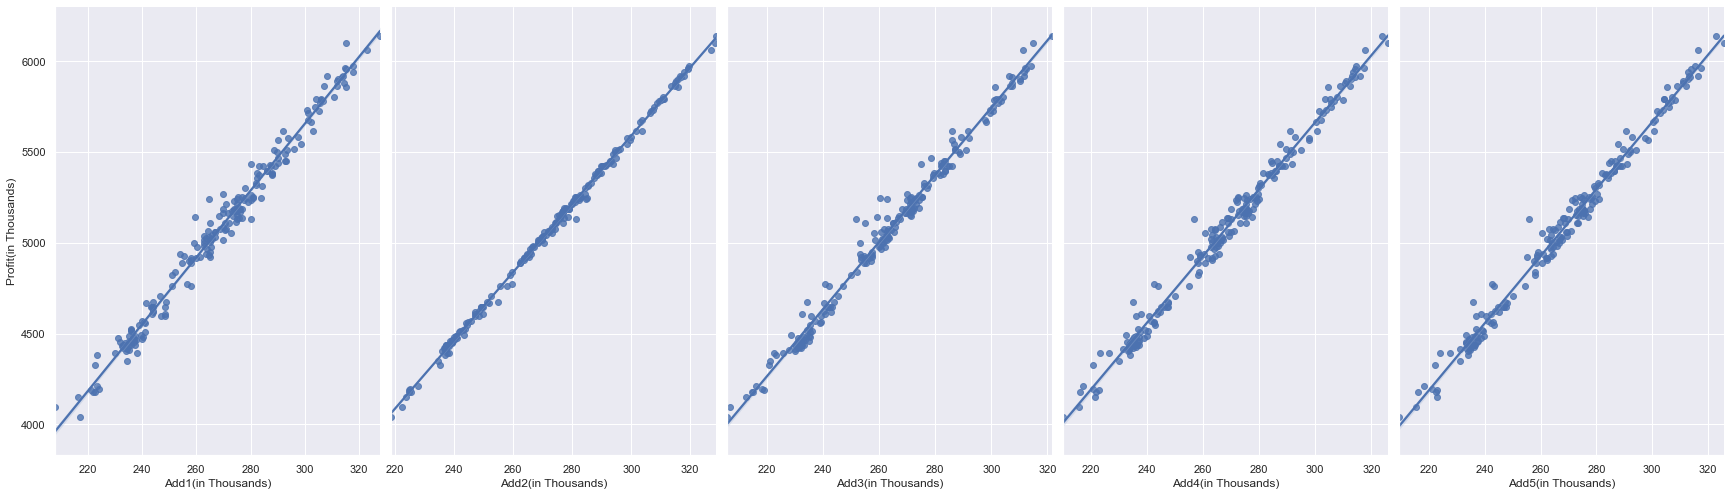

In [42]:
sns.pairplot(data, x_vars=['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)'], y_vars='Profit(in Thousands)', size=7, aspect=0.7, kind='reg');

In [43]:
# correlation matrix of the data set
data.corr()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


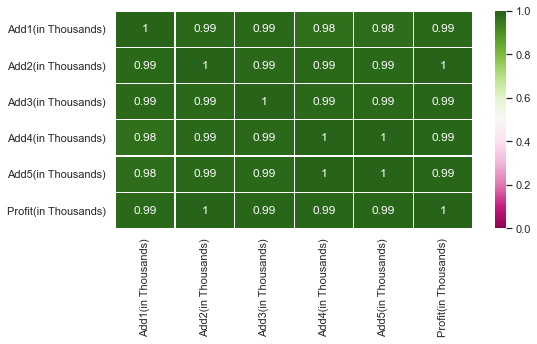

In [44]:
plt.subplots(figsize=(8,4))
sns.heatmap(data=data.corr(),vmin=0,vmax=1,annot=True,linewidths=0.2,cmap='PiYG')
plt.show()

The output above shows presence of strong linear correlation between the variables profit and Add2.But add4 and add5 highly correlated,so we delete one of the columns

In [45]:
data1=data.drop(['Add4(in Thousands)'],axis=1)

In [46]:
data1.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [47]:
X = data1[['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add5(in Thousands)']]
y = data['Profit(in Thousands)']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add5(in Thousands)
122,276.1,276.35,271.50,273.85
125,274.8,275.65,271.00,272.70
166,284.0,285.00,260.25,274.85
1,217.0,218.60,205.90,209.20
199,289.0,289.95,286.15,286.85


In [48]:
X.shape

(205, 4)

In [49]:
y_train.head()

122    5167.878
125    5153.977
166    5245.140
1      4042.448
199    5425.371
Name: Profit(in Thousands), dtype: float64

In [50]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [51]:
print(y_test)

160    5387.438
186    5861.830
59     5190.814
165    5107.437
140    5250.150
         ...   
28     4416.136
29     4482.183
182    5956.323
40     4486.996
128    5185.639
Name: Profit(in Thousands), Length: 62, dtype: float64


In [52]:
print(predictions)

[5388.40664137 5861.91283425 5191.13774474 5105.07051861 5249.79278612
 5240.04468783 5434.64727373 5164.26496113 5790.47329351 5518.85012947
 5373.99063471 4914.53143393 5491.92341504 4452.74788197 4936.5091251
 4618.27021033 5136.51521229 4821.35860598 5075.88644779 4980.76697
 5667.3343818  5616.27739683 5172.88374695 5318.56268325 5464.12583893
 5422.58733622 5245.26962475 5033.32786328 4435.98278434 4558.51725377
 5187.36406065 4153.14158579 5511.93150864 5439.39257329 5398.1753625
 5866.19526185 4934.52018055 5731.14115564 4763.29164248 5805.13887504
 5113.46583477 4392.88783551 5264.13333569 5028.01930354 4566.72655185
 4772.71307014 4452.5282465  4935.93950364 5962.6326724  5890.41544454
 4494.77109841 5616.30725664 4998.48790177 5881.10810095 4470.09589454
 5312.0247559  5238.17006348 4415.7251619  4482.2062801  5956.31914905
 4486.61102515 5185.25542691]


In [53]:
from sklearn.metrics import mean_squared_error
print('MSE is ',mean_squared_error(y_test,predictions))

MSE is  0.5363518559737488


This is the regression model with very less mean square error

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
Add1(in Thousands) 290
Add2(in Thousands) 312
Add3(in Thousands) 309
Add4(in Thousands) 298
Add5(in Thousands) 320

In [54]:
 #define input
new_input = [[290,312,309,298,320]]

In [58]:
# get prediction for new input
new_output = model.predict(new_input)

In [59]:
X = data[['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)']]
y = data['Profit(in Thousands)']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
new_input = [[290,312,309,298,320]]
# get prediction for new input
new_output = model.predict(new_input)
# summarize input and output
print(new_input, new_output)

[[290, 312, 309, 298, 320]] [5820.06]


company will get 5820.06 profit by spending these amounts for advertisement